# Generate Background Images for `ev3devsim` Robot Simulator

Simple routes for generating png files for use in `ev3devsim` robot simulator.

Image size: width 2362px, height 1143px.

*Could be useful to support interactive canvas drawing of backgrounds too?*

In [7]:
from IPython.display import Image as I
from PIL import Image, ImageDraw

mode = 'RGB'
size = (2362, 1143)
color = 'white'

## Blank Image

In [25]:
filename = '_blank.png'

img = Image.new(mode, size, color)
img.save(filename)

## Greys

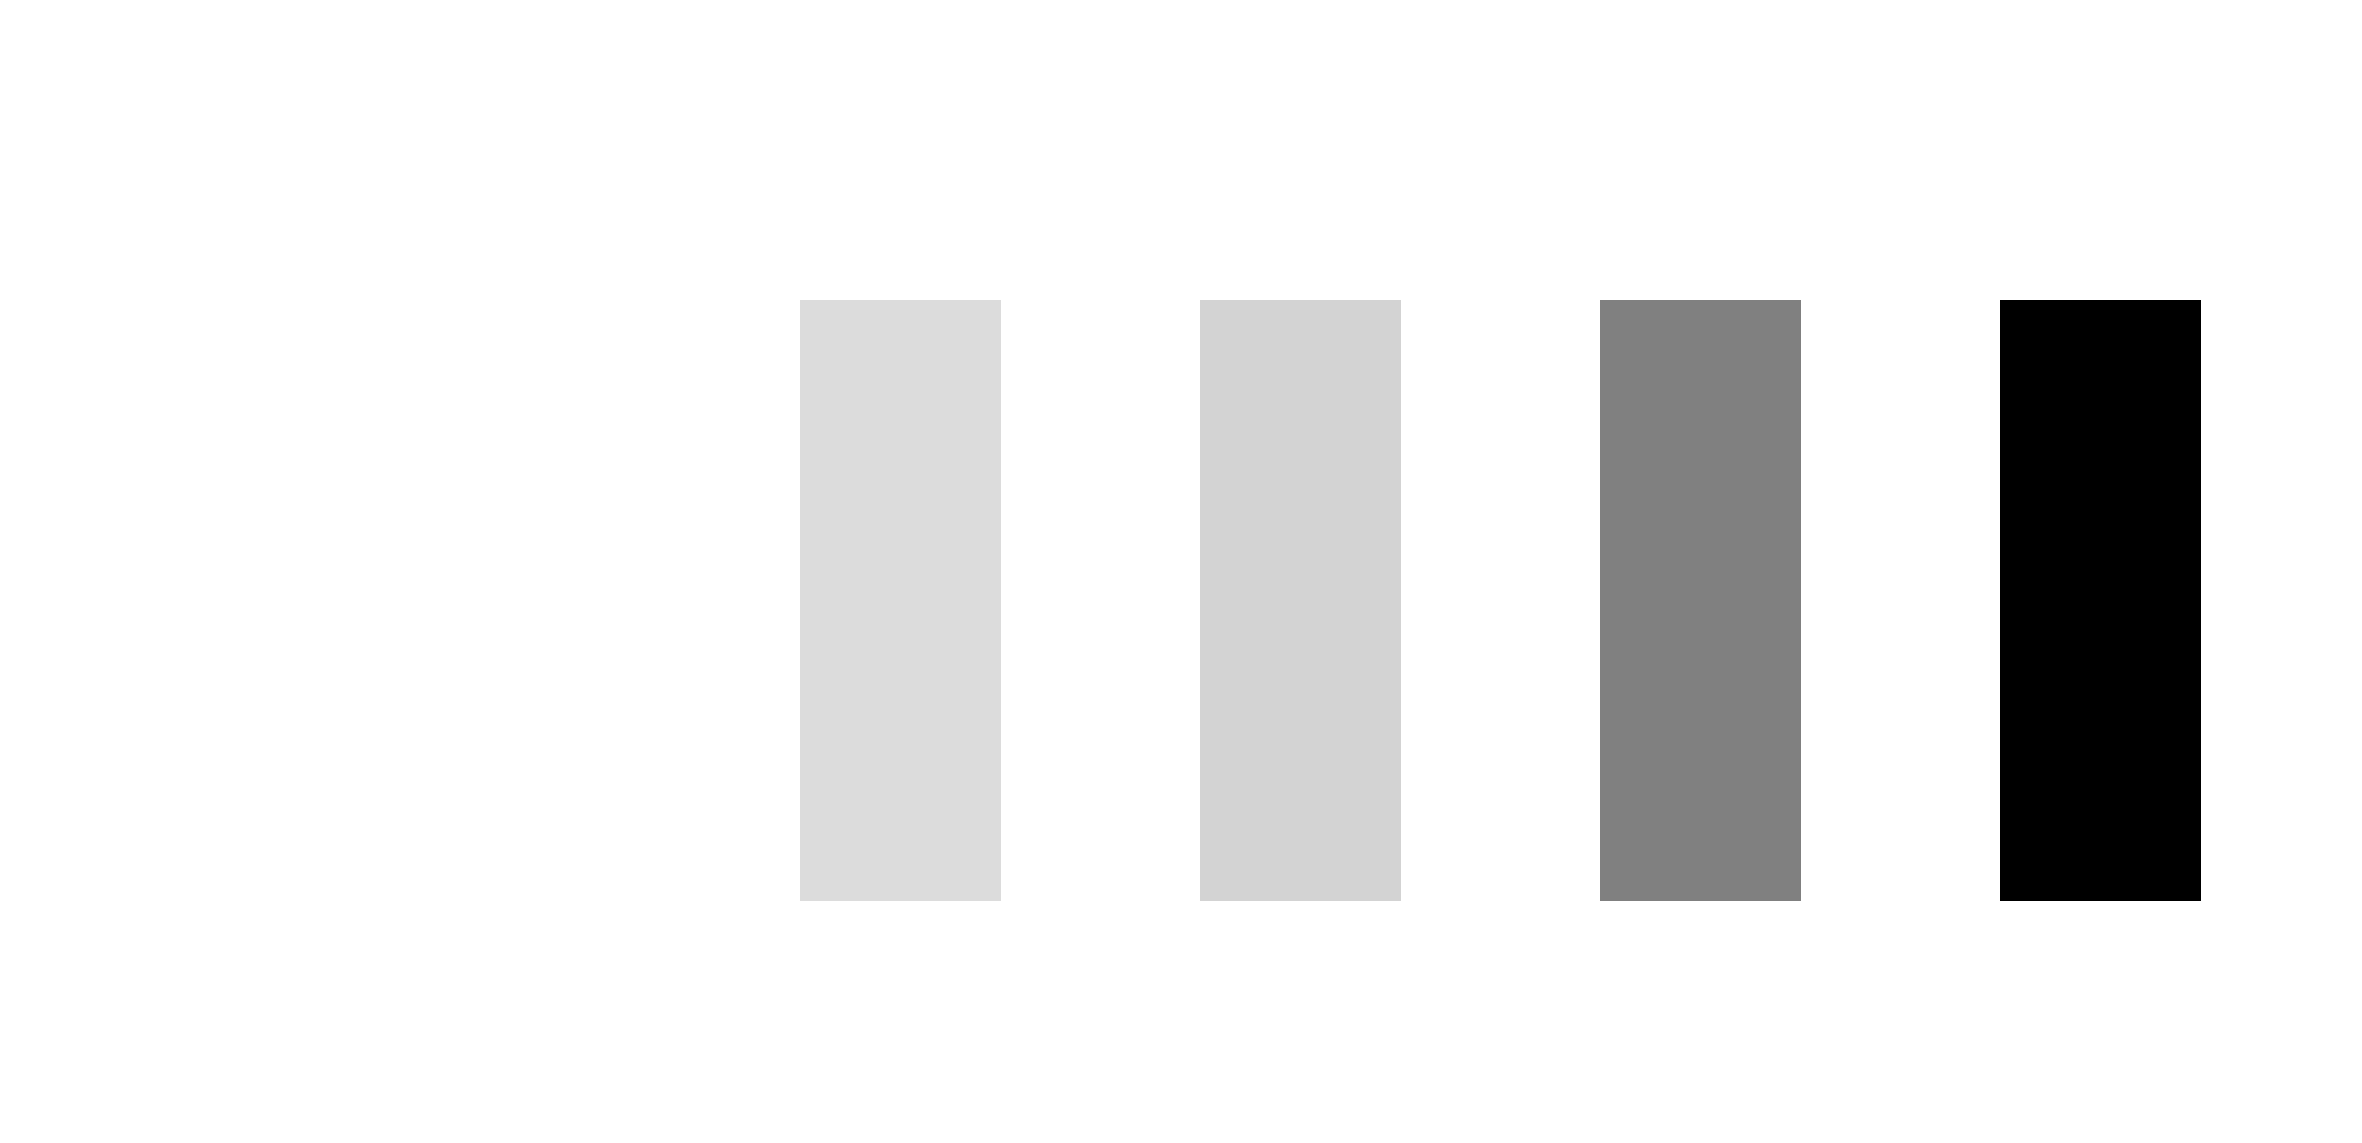

In [26]:
filename = '_greys.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

draw.rectangle([(800, 300), (1000, 900)], fill='gainsboro')
draw.rectangle([(1200, 300), (1400, 900)], fill='lightgrey')
draw.rectangle([(1600, 300), (1800, 900)], fill='grey')
draw.rectangle([(2000, 300), (2200, 900)], fill='black')
img.save(filename)
I(filename)

## Grey and Black

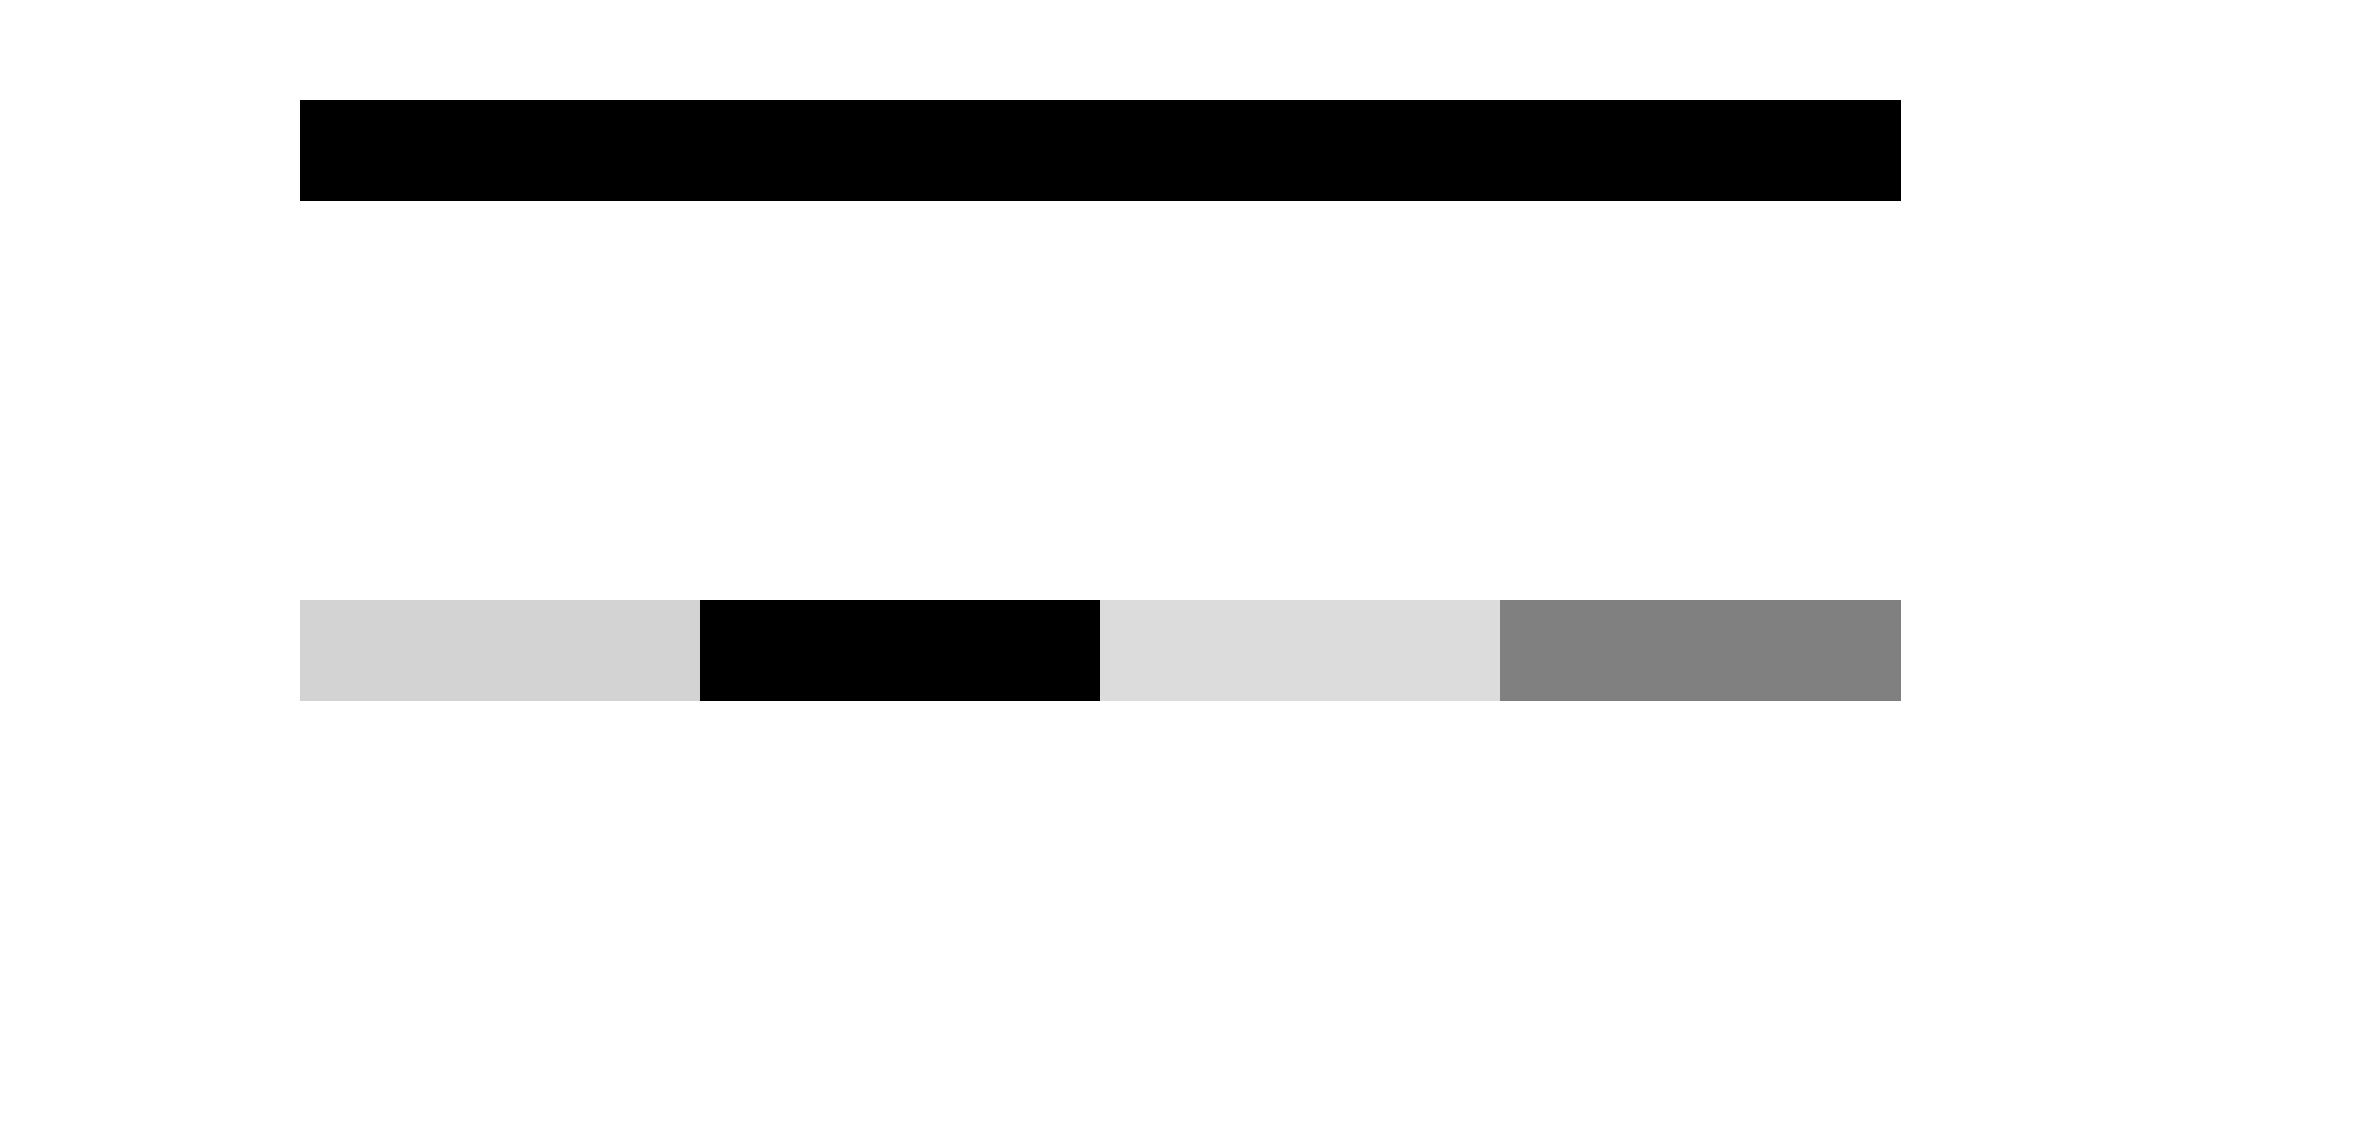

In [27]:
filename = '_grey_and_black.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

striped_band = 600
long_band = 100
band_height = 100

left_origin = 300
band_width = 400

#Black band
draw.rectangle([(left_origin, long_band), (left_origin + 4 * band_width, long_band + band_height)], fill='black')

#Light grey / black / grey band
draw.rectangle([(left_origin, striped_band), (left_origin + band_width, striped_band + band_height)], fill='lightgrey')
draw.rectangle([(left_origin + band_width, striped_band), (left_origin + 2 * band_width, striped_band + band_height)], fill='black')
draw.rectangle([(left_origin + 2 * band_width, striped_band), (left_origin + 3 * band_width, striped_band + band_height)], fill='gainsboro')
draw.rectangle([(left_origin + 3 * band_width, striped_band), (left_origin + 4 * band_width, striped_band + band_height)], fill='grey')

img.save(filename)
I(filename)

## Square

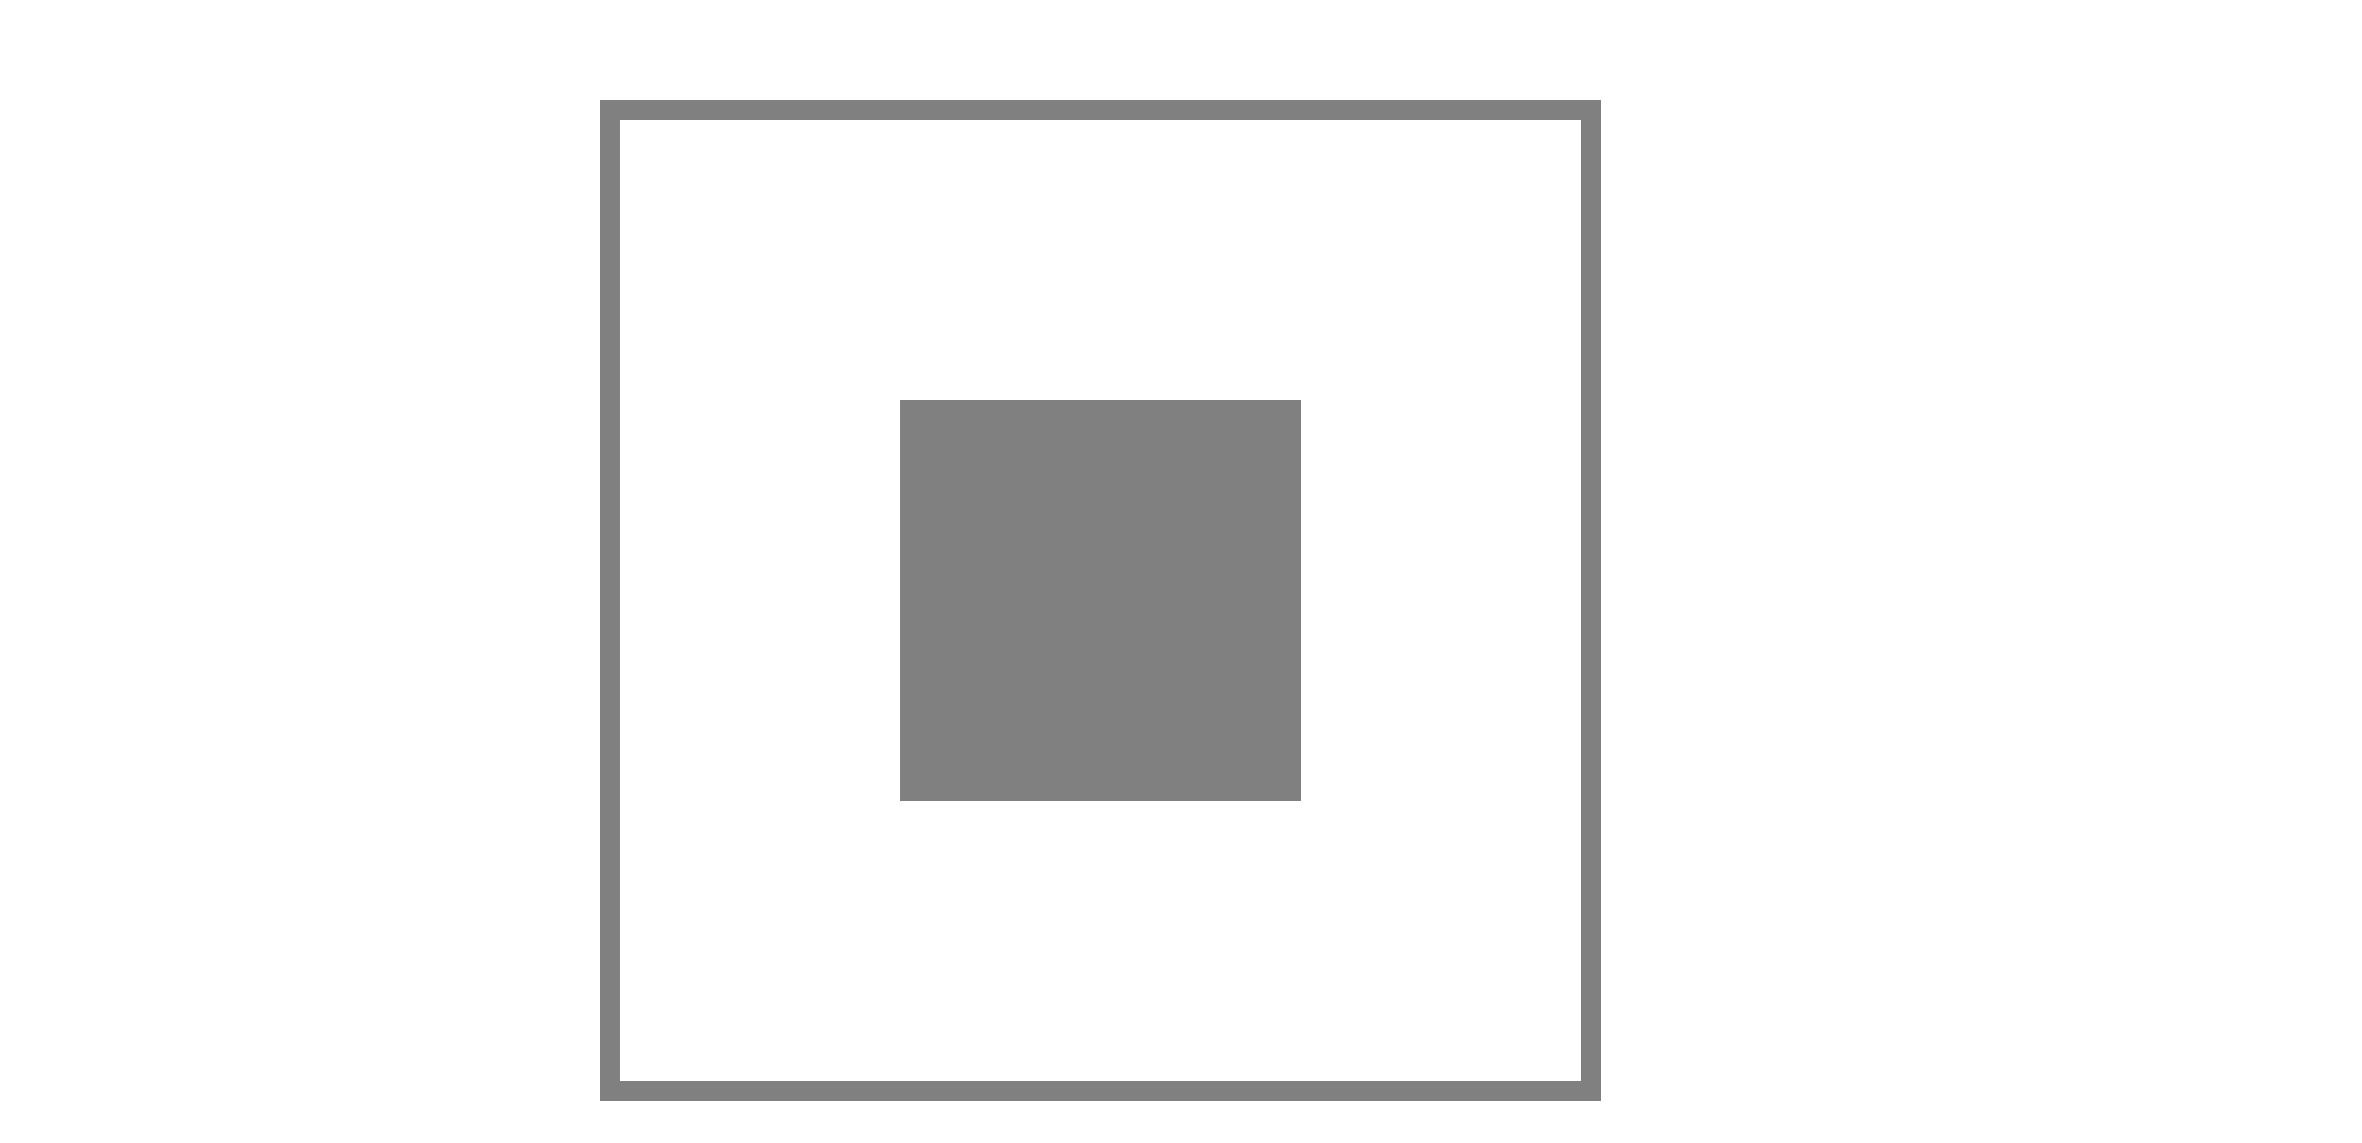

In [28]:
filename = '_square.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

draw.rectangle([(900, 400), (1300, 800)], fill='grey')
  
draw.rectangle([(600, 100), (1600, 1100)], outline ="grey", width=20) 

img.save(filename)
I(filename)

## Loop

In [29]:
#https://stackoverflow.com/a/50145023/454773

def rounded_rectangle(self: ImageDraw, xy, corner_radius, fill=None, outline=None):
    upper_left_point = xy[0]
    bottom_right_point = xy[1]
    self.rectangle(
        [
            (upper_left_point[0], upper_left_point[1] + corner_radius),
            (bottom_right_point[0], bottom_right_point[1] - corner_radius)
        ],
        fill=fill,
        outline=outline
    )
    self.rectangle(
        [
            (upper_left_point[0] + corner_radius, upper_left_point[1]),
            (bottom_right_point[0] - corner_radius, bottom_right_point[1])
        ],
        fill=fill,
        outline=outline
    )
    self.pieslice([upper_left_point, (upper_left_point[0] + corner_radius * 2, upper_left_point[1] + corner_radius * 2)],
        180,
        270,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, bottom_right_point[1] - corner_radius * 2), bottom_right_point],
        0,
        90,
        fill=fill,
        outline=outline
    )
    self.pieslice([(upper_left_point[0], bottom_right_point[1] - corner_radius * 2), (upper_left_point[0] + corner_radius * 2, bottom_right_point[1])],
        90,
        180,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, upper_left_point[1]), (bottom_right_point[0], upper_left_point[1] + corner_radius * 2)],
        270,
        360,
        fill=fill,
        outline=outline
    )


ImageDraw.rounded_rectangle = rounded_rectangle

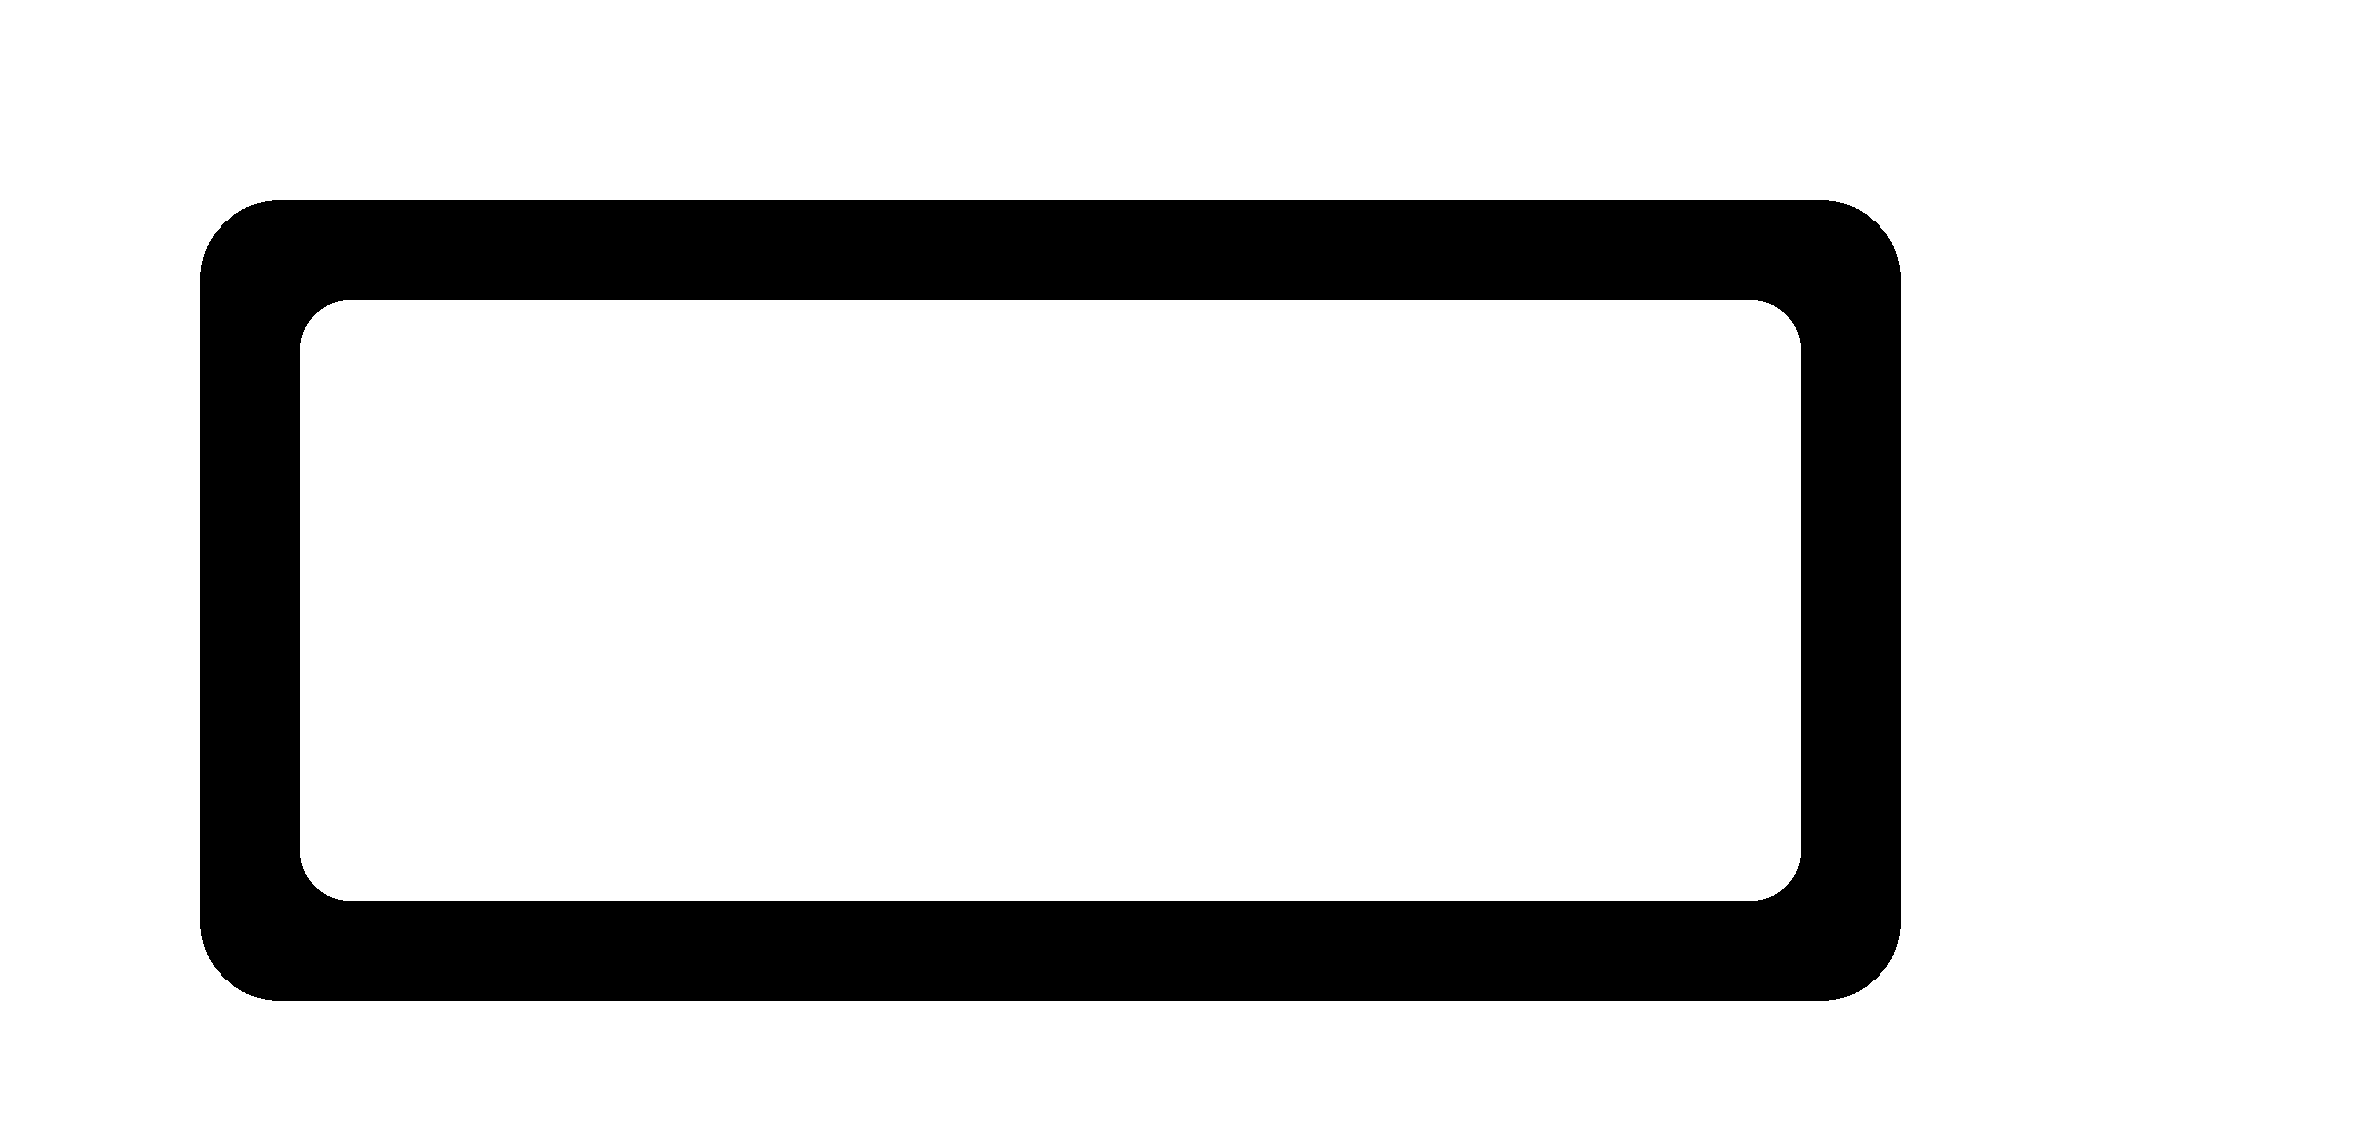

In [31]:
filename = '_loop.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

draw.rounded_rectangle([(200, 200), (1900, 1000)], 80, fill='black')
draw.rounded_rectangle([(300, 300), (1800, 900)], 50, fill='white')
img.save(filename)
I(filename)

## Radial Gradient (Braitenberg)

In [10]:
for i in range(1, 10):
    print(i, math.log10(i))

1 0.0
2 0.3010299956639812
3 0.47712125471966244
4 0.6020599913279624
5 0.6989700043360189
6 0.7781512503836436
7 0.8450980400142568
8 0.9030899869919435
9 0.9542425094393249


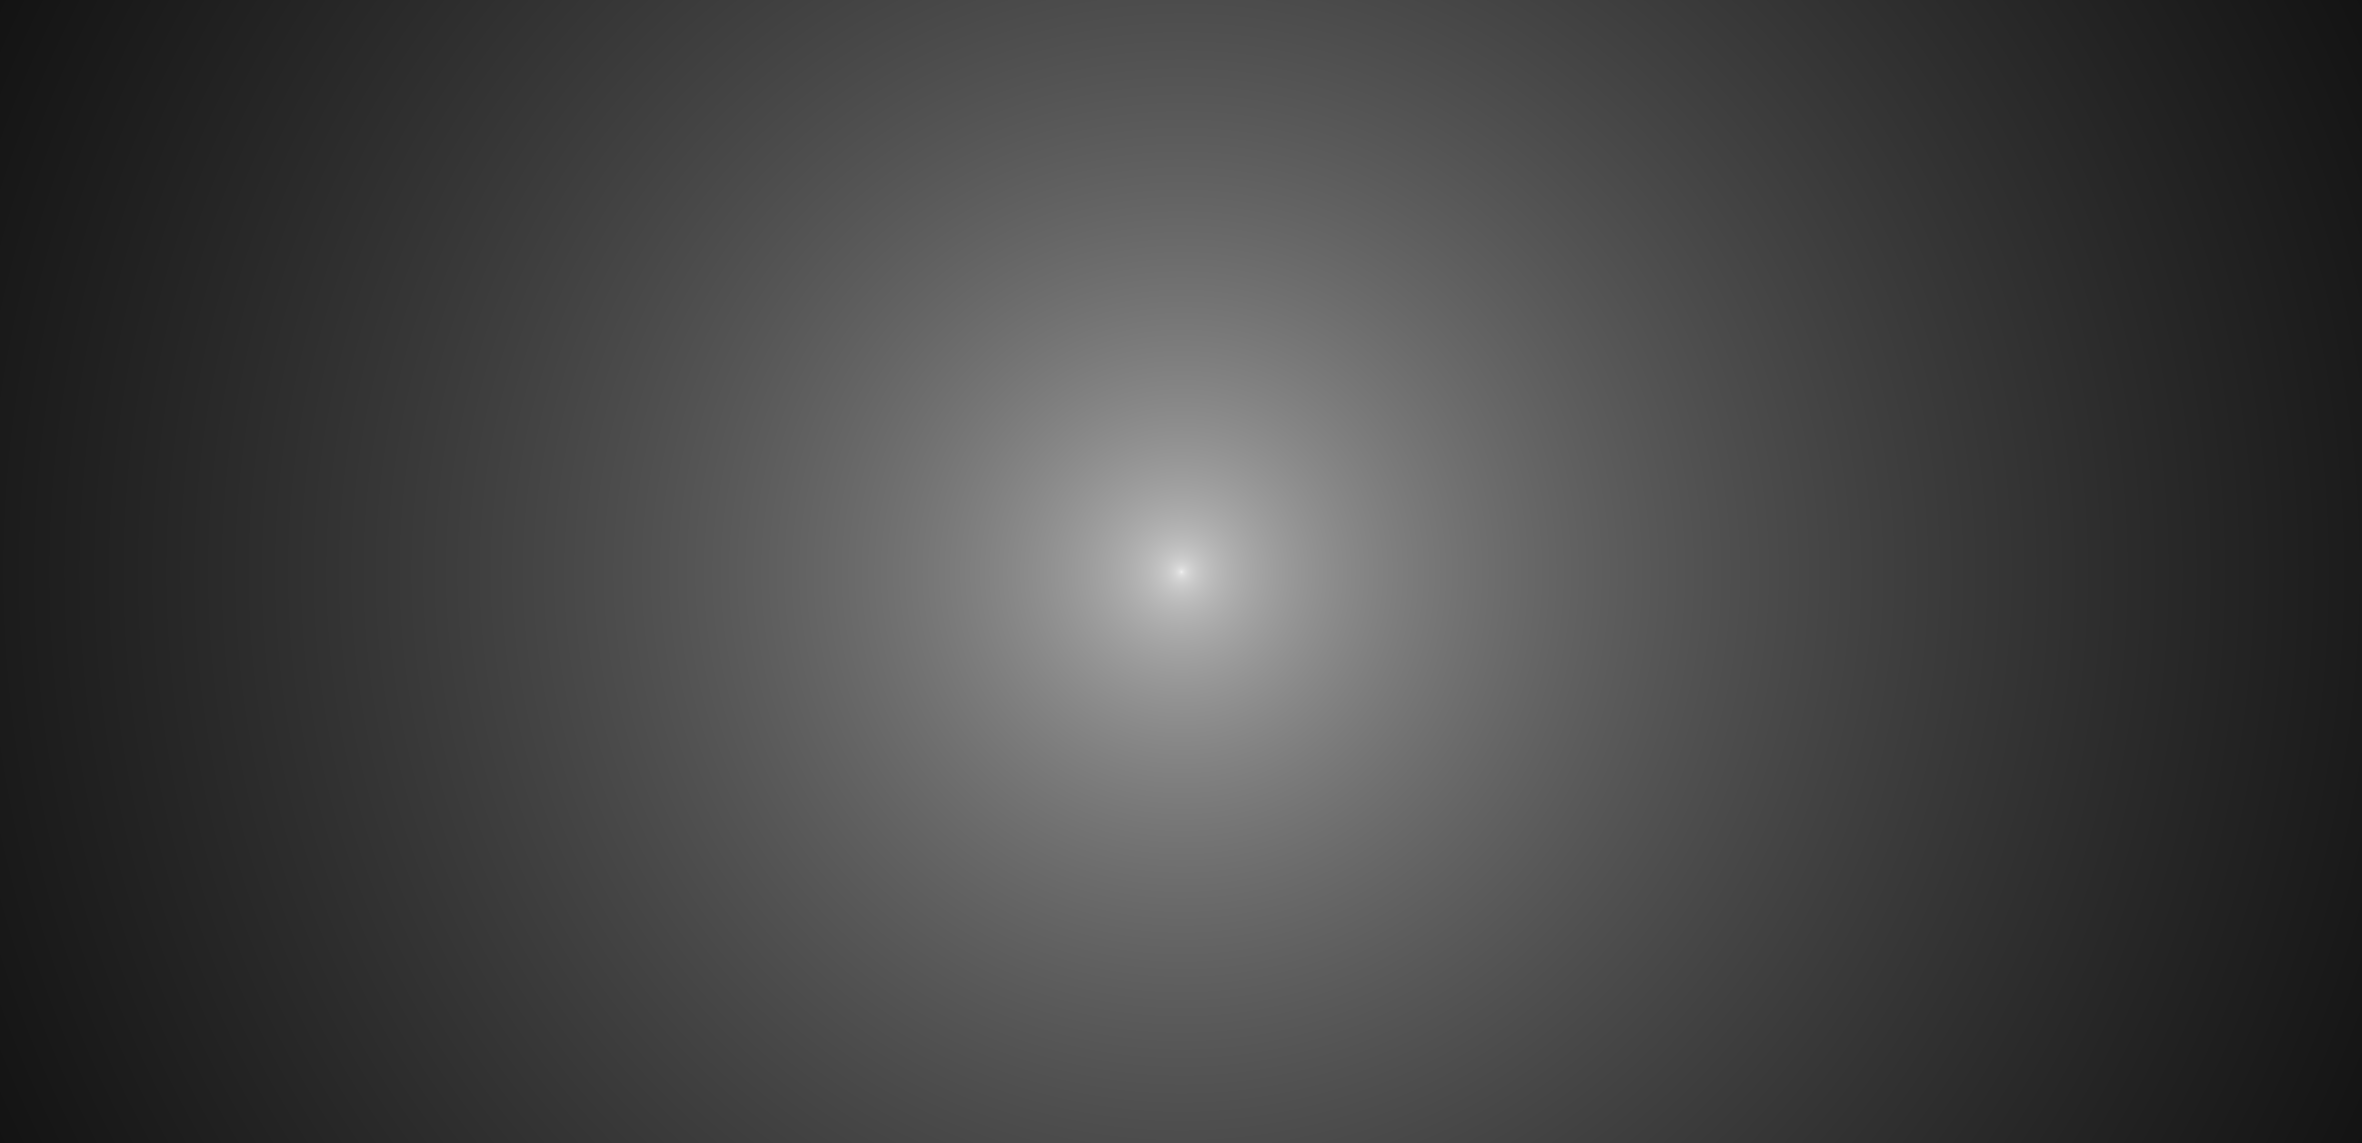

In [14]:
import math

img = Image.new(mode, size, color)


innerBlue = [80, 80, 255] #Color at the center
outerBlue = [0, 0, 80] #Color at the corners
blues = ('_radial_blue.png', innerBlue, outerBlue)

innerRed = [255, 80, 80] #Color at the center
outerRed = [80, 0, 0] #Color at the corners
reds = ('_radial_red.png', innerRed, outerRed)

innerGrey = [255, 255, 255] #Color at the center
outerGrey = [0, 0, 0] #Color at the corners
greys = ('_radial_grey.png', innerGrey, outerGrey)


#https://stackoverflow.com/a/30669765/454773
def radial(img, radial_config):
    """Gnerate a radial gradient image."""
    (filename, innerColor, outerColor) = radial_config
    for y in range(size[1]):
        for x in range(size[0]):

            #Find the distance to the center
            distanceToCenter = math.sqrt((x - size[0]/2) ** 2 + (y - size[1]/2) ** 2)

            #Make it on a scale from 0 to 1
            distanceToCenter = float(distanceToCenter) / (math.sqrt(2) * size[0]/2)

            #Make non-linear
            #distanceToCenter = math.sqrt(distanceToCenter)
            distanceToCenter = distanceToCenter**(1./3.)
            
            #Calculate r, g, and b values
            r = outerColor[0] * distanceToCenter + innerColor[0] * (1 - distanceToCenter)
            g = outerColor[1] * distanceToCenter + innerColor[1] * (1 - distanceToCenter)
            b = outerColor[2] * distanceToCenter + innerColor[2] * (1 - distanceToCenter)

            #Place the pixel        
            img.putpixel((x, y), (int(r), int(g), int(b))) 
    
    img.save(filename)
    return filename, img

#filename, _ = radial(img, blues)
#filename, _ = radial(img, reds)
filename, _ = radial(img, greys)

I(filename)

## Tones

Example tones for use as various audio cues.

In [ ]:
from IPython.display import Javascript

In [ ]:
#via ??

## See also:
# https://marcgg.com/blog/2016/11/01/javascript-audio/
# https://css-tricks.com/introduction-web-audio-api/

tone='''
var context = new AudioContext()
var o = null
var g = null
document.addEventListener('DOMContentLoaded', function() {
    $(".js_play_sound").on("click", function(e) {
        e.preventDefault()
        var $target = $(e.target)
        eval($target.data("source"))
    })
    $(".js_stop_sound").on("click", function(e) {
        e.preventDefault()
        o.stop()
    })
}, false)

function example1() {
    o = context.createOscillator()
    o.type = "sine"
    o.connect(context.destination)
    o.start()
}

function example2() {
    o = context.createOscillator()
    g = context.createGain()
    o.connect(g)
    g.connect(context.destination)
    o.start(0)
}

function example2Stop(decreaseTime) {
    g.gain.exponentialRampToValueAtTime(0.00001, context.currentTime + decreaseTime)
}

function example3(type, x) {
    o = context.createOscillator()
    g = context.createGain()
    o.connect(g)
    o.type = type
    g.connect(context.destination)
    o.start(0)
    g.gain.exponentialRampToValueAtTime(0.00001, context.currentTime + x)
}

function example4(frequency, type) {
    o = context.createOscillator()
    g = context.createGain()
    o.type = type
    o.connect(g)
    o.frequency.value = frequency
    g.connect(context.destination)
    o.start(0)
    g.gain.exponentialRampToValueAtTime(0.00001, context.currentTime + 1)
}
'''

In [ ]:
# Bright success?
Javascript(tone+"example3('square', 1.5)")

In [ ]:
# Deeper fail?
Javascript(tone+"example4('50', 'sawtooth')")